# Underfitting

We have seen in previous modules that when a model performs extremely well on training data and poorly on testing data, such a model is said to exhibit overfitting. On the other hand, if a model neither performs on training data nor on validation data, it is called underfitting. Additionally, we have seen several techniques to overcome overfitting. In this module, we will see how we can avoid underfitting.

There are a number of techniques to avoid underfitting; some of them are as follows:
1. using a longer neural network architecture
2. using a longer and bigger dataset
3. using a pre-trained module

In this module, we will see how can we avoid underfitting using a larger dataset and a pre-trained module.

## Training a Model Using Smaller Dataset

Let's first define a model and train it on a small dataset for 30 epochs. The dataset contains 548 training images and 176 test images belonging to 2 classes: dogs and cats.


### Create a Model

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
def create_model():
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                  input_shape = (224, 224, 3), data_format = 'channels_last'))

  # model.add(BatchNormalization())
  # model.add(Dropout(rate = 0.5))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                  activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(rate = 0.5))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                  activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(rate = 0.5))

  model.add(Flatten())

  # model.add(BatchNormalization())
  # model.add(Dropout(rate = 0.5))
  model.add(Dense(units=512, activation='relu'))

  # model.add(BatchNormalization())
  # model.add(Dropout(rate = 0.5))
  model.add(Dense(units=1, activation = 'sigmoid'))
  model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
  )
  return model


model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

### Data Augmentation

Let's apply data augmentation to avoid overfitting.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen_aug = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    zoom_range=0.2
                    )

val_gen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_iter = train_gen_aug.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest')

test_iter = val_gen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


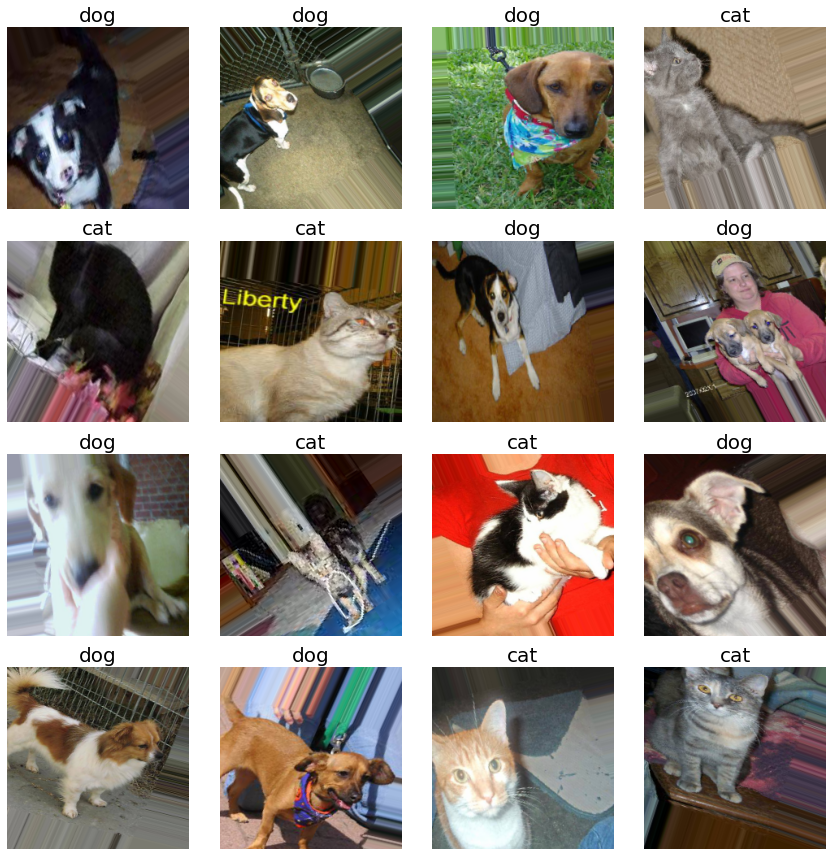

In [6]:
# Let's display some of the images

import matplotlib.pyplot as plt

images, labels = train_iter.next()
class_names = ['cat', 'dog']
plt.figure(figsize = (12, 12))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  plt.title(class_names[int(labels[i])], fontsize = 20)
  plt.axis('off')

plt.tight_layout()

### Training the Model

In [7]:
history = model.fit(train_iter, validation_data = test_iter, epochs = 30)

Epoch 1/30
18/18 [==============================] - 343s 17s/step - loss: 1.7628 - accuracy: 0.5091 - val_loss: 0.6834 - val_accuracy: 0.5568
Epoch 2/30
18/18 [==============================] - 11s 598ms/step - loss: 0.6940 - accuracy: 0.5383 - val_loss: 0.6730 - val_accuracy: 0.6591
Epoch 3/30
18/18 [==============================] - 11s 593ms/step - loss: 0.6782 - accuracy: 0.5730 - val_loss: 0.6652 - val_accuracy: 0.6080
Epoch 4/30
18/18 [==============================] - 11s 591ms/step - loss: 0.6634 - accuracy: 0.6077 - val_loss: 0.6615 - val_accuracy: 0.6080
Epoch 5/30
18/18 [==============================] - 11s 594ms/step - loss: 0.6632 - accuracy: 0.5839 - val_loss: 0.6440 - val_accuracy: 0.6193
Epoch 6/30
18/18 [==============================] - 11s 589ms/step - loss: 0.6643 - accuracy: 0.6168 - val_loss: 0.6498 - val_accuracy: 0.6136
Epoch 7/30
18/18 [==============================] - 11s 593ms/step - loss: 0.6493 - accuracy: 0.6314 - val_loss: 0.6556 - val_accuracy: 0.5739


### Plotting History


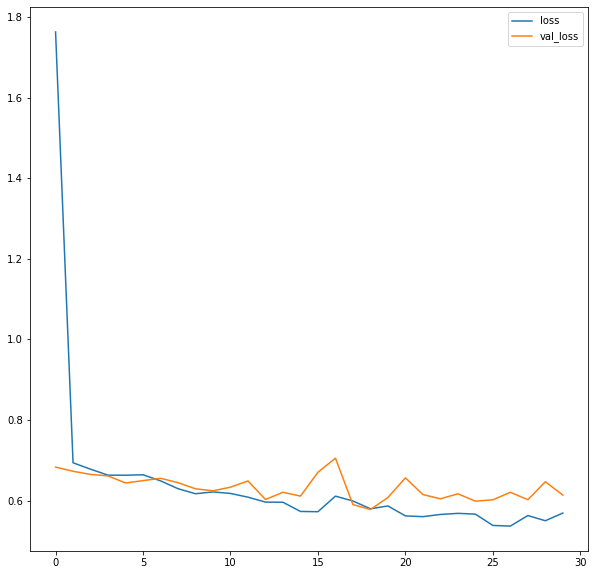

In [8]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

***
## Training a Model Using a Larger Dataset



In [9]:
# The path of the main directory
large_dataset_catdog =  '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/cats_and_dogs_filtered'

# The path of the train directory
large_train_dir = os.path.join(large_dataset_catdog, 'train')

# The path of the test directory
large_test_dir = os.path.join(large_dataset_catdog, 'validation')

# The path of the dog directory inside train sub-directory
large_train_dir_dog = os.path.join(large_train_dir, 'dogs')

# The path of the cat directory inside train sub-directory
large_train_dir_cat = os.path.join(large_train_dir, 'cats')

# The path of the dog directory inside test sub-directory
large_test_dir_dog = os.path.join(large_test_dir, 'dogs')

# The path of the cat directory inside test sub-directory
large_test_dir_cat = os.path.join(large_test_dir, 'cats')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
large_train_cat_image_names = os.listdir(large_train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
large_train_dog_image_names = os.listdir(large_train_dir_dog)

### Data Augmentation

Let's apply data augmentation to avoid overfitting.

In [10]:
large_train_iter = train_gen_aug.flow_from_directory(
    directory = large_train_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest')

large_test_iter = val_gen.flow_from_directory(
    directory = large_test_dir,
    target_size = (224, 224),
    class_mode = 'binary',
    batch_size = 32)

Found 1996 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


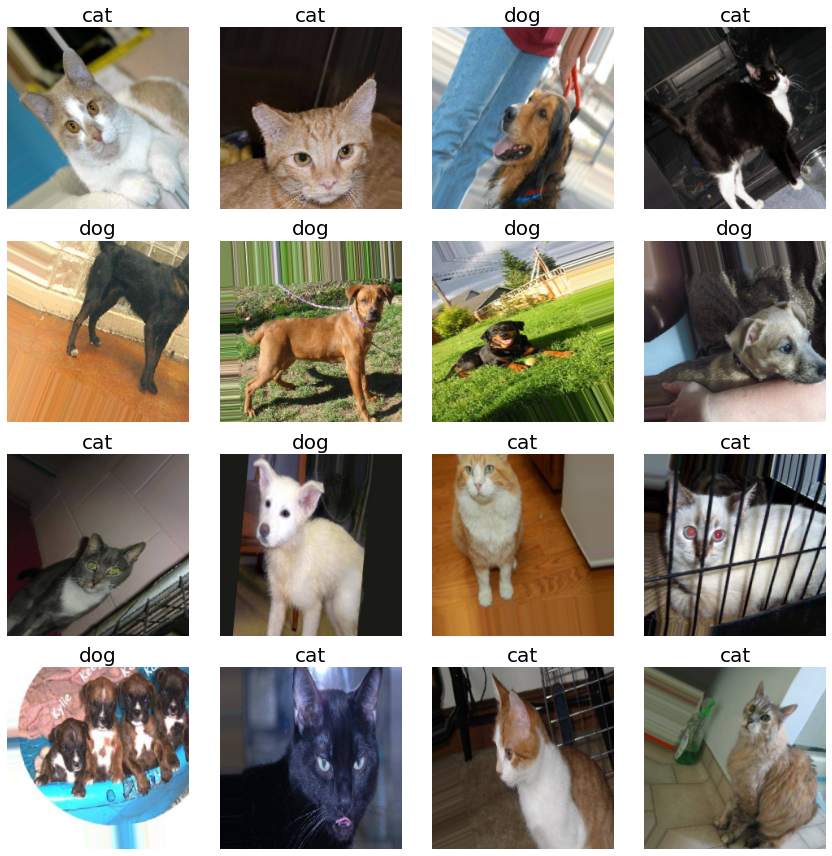

In [11]:
images, labels = large_train_iter.next()
class_names = ['cat', 'dog']
plt.figure(figsize = (12, 12))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  plt.title(class_names[int(labels[i])], fontsize = 20)
  plt.axis('off')

plt.tight_layout()

### Create and Train the Model

In [ ]:
del model
model = create_model()
large_history = model.fit(large_train_iter, validation_data = large_test_iter, epochs = 30)

Epoch 1/30
55/63 [=========================>....] - ETA: 1:53 - loss: 0.8170 - accuracy: 0.5126

### Plotting History

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(large_history.history['loss'])
plt.plot(large_history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

## Transfer Learning a Pre-Trained Model (ResNet50)

Let's load the [ResNet50](https://keras.io/applications/#resnet)  model designed by a team at Microsoft Research, available through Keras applications. We know that ResNet50 was developed to classify 10000 classes; whereas, in our case, we have only two classes. Therefore, we will do the following:

1. We don't include the top layer. Later, we can add our own top layer.
2. We will not train all the layers; instead, we will train only the layers, which we will add.

In [ ]:
del model
from tensorflow.keras.applications import ResNet50
model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224, 224, 3)
)

for layer in model.layers:
  layer.trainable = False


model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

### Modify the Loaded Model

Let's add three layers to the loaded pre-trained model.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
last_layer_output = model.output
x = layers.Flatten()(last_layer_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### Transfer Learning the Pre-Trained Model

Let's train the model, as we have set all the layers of the pre-trained module, so only the layers we have added will be trained.

In [ ]:

pre_history = model.fit(large_train_iter, validation_data = large_test_iter, epochs = 30)

Epoch 1/30
63/63 [==============================] - 38s 548ms/step - loss: 1.1360 - accuracy: 0.5170 - val_loss: 0.6558 - val_accuracy: 0.6210
Epoch 2/30
63/63 [==============================] - 35s 559ms/step - loss: 0.7140 - accuracy: 0.5810 - val_loss: 0.6402 - val_accuracy: 0.6360
Epoch 3/30
63/63 [==============================] - 33s 528ms/step - loss: 0.7154 - accuracy: 0.5810 - val_loss: 0.8163 - val_accuracy: 0.5060
Epoch 4/30
63/63 [==============================] - 35s 554ms/step - loss: 0.6904 - accuracy: 0.5930 - val_loss: 0.6786 - val_accuracy: 0.6190
Epoch 5/30
63/63 [==============================] - 33s 529ms/step - loss: 0.7110 - accuracy: 0.5895 - val_loss: 0.6276 - val_accuracy: 0.6710
Epoch 6/30
63/63 [==============================] - 35s 554ms/step - loss: 0.7162 - accuracy: 0.5765 - val_loss: 0.7282 - val_accuracy: 0.5380
Epoch 7/30
63/63 [==============================] - 34s 544ms/step - loss: 0.7104 - accuracy: 0.5890 - val_loss: 0.8903 - val_accuracy: 0.5130

# References
1. [How to Choose the Best Keras Pre-Trained Model for Image Classification](https://towardsdatascience.com/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4)
2. [Use pre-trained Huggingface models in TensorFlow Serving](https://towardsdatascience.com/use-pre-trained-huggingface-models-in-tensorflow-serving-d2761f7e69f6)
3. [Transfer Learning in Keras with Computer Vision Models](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)
4. [Top 4 Pre-Trained Models for Image Classification with Python Code](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/)
5. [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)
6. [Keras Applications
](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
7. [AlexNet: The First CNN to win Image Net](https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/)
8. [Introduction to The Architecture of Alexnet](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/)
9. [AlexNet: The Architecture that Challenged CNNs](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)
10. [Understanding AlexNet](https://learnopencv.com/understanding-alexnet/)
11. [AlexNet – ImageNet Classification with Deep Convolutional Neural Networks](https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/)
12. [Architecture of AlexNet and its current use](https://iq.opengenus.org/architecture-and-use-of-alexnet/)
13. [Transfer Learning Guide: A Practical Tutorial With Examples for Images and Text in Keras](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)
14. [TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
15. [Tensorflow Keras Tutorial - Neural Network (Part 1)](https://www.kaggle.com/akashkr/tf-keras-tutorial-neural-network-part-1)
16. [Tensorflow Keras Tutorial - Convolutional Neural Network (Part 2)](https://www.kaggle.com/akashkr/tf-keras-tutorial-cnn-part-2)
17. [Tensorflow Keras Tutorial - Binary Classification (Part 3)](https://www.kaggle.com/akashkr/tf-keras-tutorial-binary-classification-part-3)
18. [Tensorflow Keras Tutorial - Using Pretrained Models and Multiclass Classification (Part 4)](https://www.kaggle.com/akashkr/tf-keras-tutorial-pretrained-models-part-4)
19. [Tensorflow Keras Tutorial - Basics of NLP (Part 5)](https://www.kaggle.com/akashkr/tf-keras-tutorial-basics-of-nlp-part-5)
20. [CNN Transfer Learning & Fine Tuning](https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2)

# References for Underfitting and Overfitting
1. [Underfitting and Overfitting in machine learning and how to deal with it !!!](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf)
2. [What Are Overfitting and Underfitting in Machine Learning?](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690)
3. [Tackling Underfitting And Overfitting Problems In Data Science](https://analyticsindiamag.com/tackling-underfitting-and-overfitting-problems-in-data-science/)
4. [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)